# Laboratorio 1: Regresión en California

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "California Housing dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#activa los gráficos 3D interactivos:
!pip install ipympl
%matplotlib widget

In [56]:
from google.colab import output
output.enable_custom_widget_manager()

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [57]:
from sklearn.datasets import fetch_california_housing
X_california, y_california = fetch_california_housing(return_X_y=True, as_frame=True)
california = fetch_california_housing()

In [58]:
full = pd.concat([X_california, y_california], axis=1)
full.sample(20)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
13346  4.8281      11.0  5.525606   1.029650      1044.0  2.814016     34.03   
11633  4.7466      19.0  5.765661   1.013921      1286.0  2.983759     33.82   
3885   5.1265      34.0  5.897163   1.060284       762.0  2.702128     34.21   
4475   3.2279      39.0  4.396648   1.011173       731.0  4.083799     34.08   
2376   1.7132      21.0  3.820197   1.041872      1519.0  3.741379     36.69   
4655   2.5284      44.0  3.896040   0.965347      1323.0  3.274752     34.05   
4582   1.1346      17.0  1.868074   1.027265      3915.0  3.443272     34.06   
10181  4.5300      35.0  5.601415   1.035377      1343.0  3.167453     33.86   
20320  4.0878      36.0  5.051799   0.955396      2965.0  4.266187     34.25   
500    1.5817      52.0  5.438017   1.173554       875.0  2.410468     37.85   
5670   4.1812      52.0  5.701389   0.996528       692.0  2.402778     33.73   
9992   2.3062      16.0  5.263158   1.036842       508.0  2.673684     39.09   
18839  2.5357      19.0  5.994550   1.128065       950.0  2.588556     41.76   
1615   6.5814      33.0  7.435449   1.094092      1351.0  2.956236     37.87   
12435  2.2679      12.0  4.730769   1.065385      1334.0  5.130769     33.68   
19022  4.0329      16.0  5.827500   1.125000      1074.0  2.685000     38.34   
7954   2.6406      32.0  3.878661   0.985356      1363.0  2.851464     33.87   
13004  3.8906      15.0  4.832386   0.982955       723.0  2.053977     38.67   
19359  3.5156      21.0  4.864865   1.297297       131.0  1.770270     38.80   
19422  3.3036      52.0  8.725000   1.475000       121.0  3.025000     37.70   

       Longitude  MedHouseVal  
13346    -117.64        1.370  
11633    -118.02        2.583  
3885     -118.52        2.110  
4475     -118.17        1.585  
2376     -119.55        0.559  
4655     -118.33        2.263  
4582     -118.27        1.375  
10181    -117.95        1.935  
20320    -119.15        1.868  
500      -122.27        1.536  
5670     -118.31        3.215  
9992     -121.11        1.388  
18839    -122.73        0.942  
1615     -122.11        3.142  
12435    -116.16        0.614  
19022    -121.97        1.268  
7954     -118.16        1.567  
13004    -121.27        1.287  
19359    -123.01        1.333  
19422    -121.04        1.975

California Housing dataset
--------------------------

**Data Set Characteristics:**

    Number of Instances: 20640

    Number of Attributes: 8 numeric, predictive attributes and the target

    Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_california, y_california, train_size=0.8, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

-----------------------------------------------------------------------------------------------------

1. El conjunto de datos trata sobre las casas de California y viene del censo de EE. UU. de 1990, utilizando una fila por grupo de bloques censales. Un grupo de bloques es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra (un grupo de bloques suele tener una población de 600 a 3000 personas).

        Un hogar es un grupo de personas que residen dentro de una casa. Dado que la cantidad promedio de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores sorprendentemente grandes para grupos de bloques con pocos hogares y muchas casas vacías, como centros vacacionales.

2. La variable objetivo es el precio mediano de las casas para los distritos de California, expresado en cientos de miles de dólares ($100.000).

3. Los atributos disponibles son:

        - MedInc        ingreso mediano del bloque
        - HouseAge      edad mediana del hogar en el bloque
        - AveRooms      número medio de habitaciones por hogar
        - AveBedrms     número promedio de dormitorios por hogar
        - Population    población del bloque
        - AveOccup      número promedio de personas que ocupan el hogar
        - Latitude      latitud del bloque
        - Longitude     longitud del bloque

4. Los atributos más determinantes para la predicción, imaginamos que serían el ingreso mediano (MedInc), el número de habitaciones (AveRooms) y la zona (latitud y longitud).

5. Uno de los problemas a priori que observamos es que los datos son de 1990, por lo que no son datos relativamente actuales. Otro problema podría ser que los datos son únicamente de California, por lo que no se pueden extrapolar a otros estados. Por otro lado, hay columnas como population que tienen valores muy dispersos, debido a como es censada la información.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

#### 1. Gráficas de cada atributo con la variable objetivo

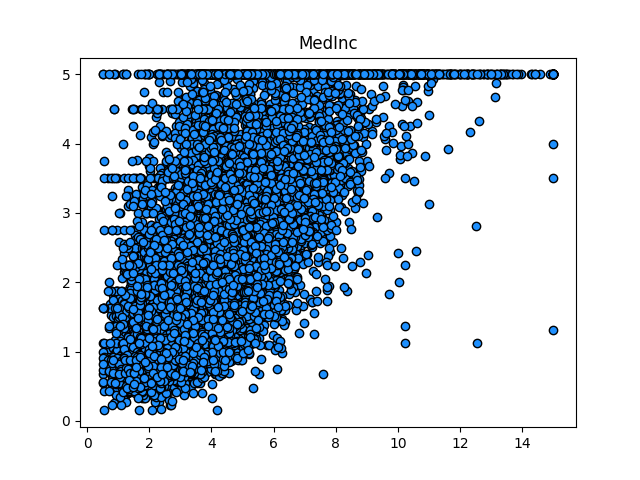

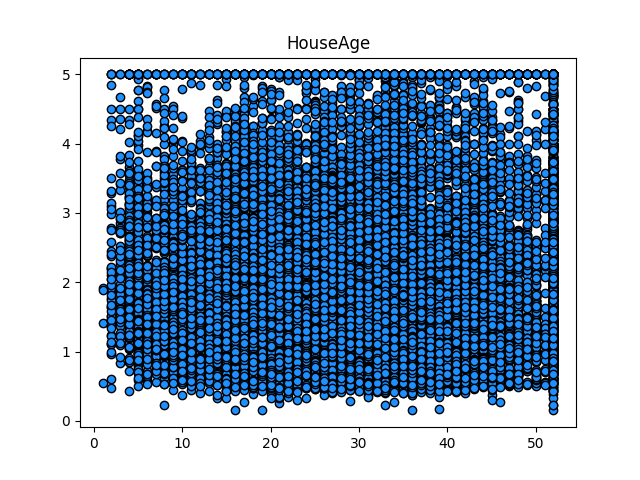

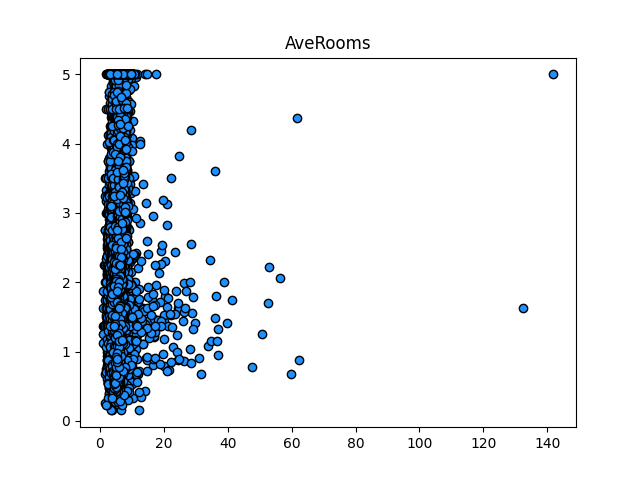

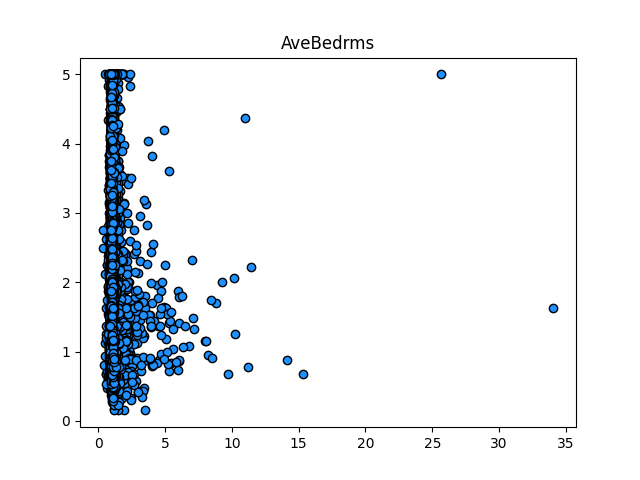

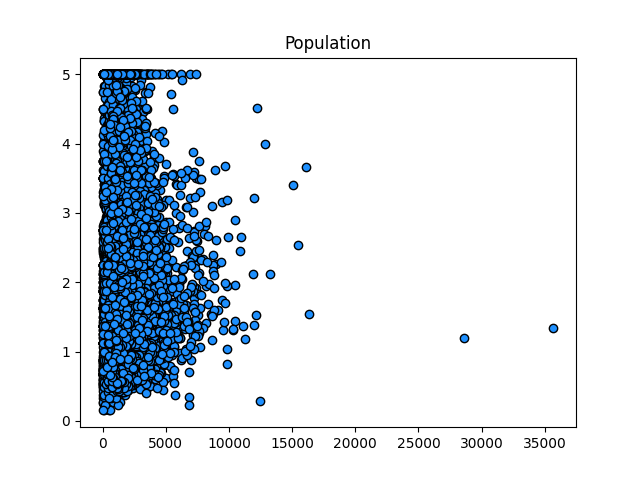

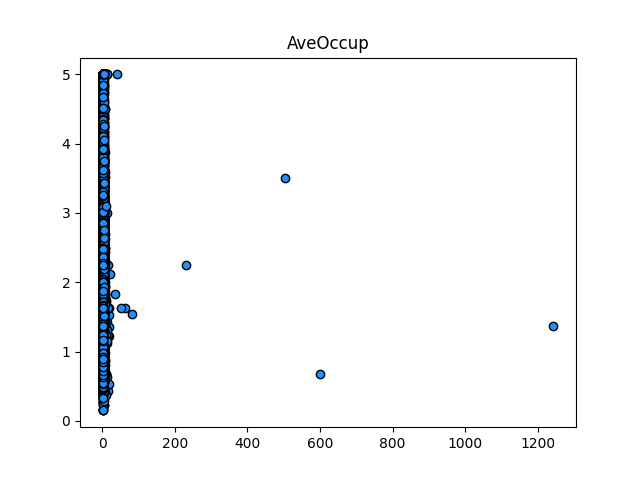

In [60]:
for feature_name in california['feature_names']:
    if feature_name in ['Latitude', 'Longitude']:
        continue

    data = X_california[[feature_name]]
    target = y_california
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(data, target, facecolor="dodgerblue", edgecolor="k")
    plt.title(feature_name)
    plt.show()

Text(0.5, 0, 'MedHouseVal')

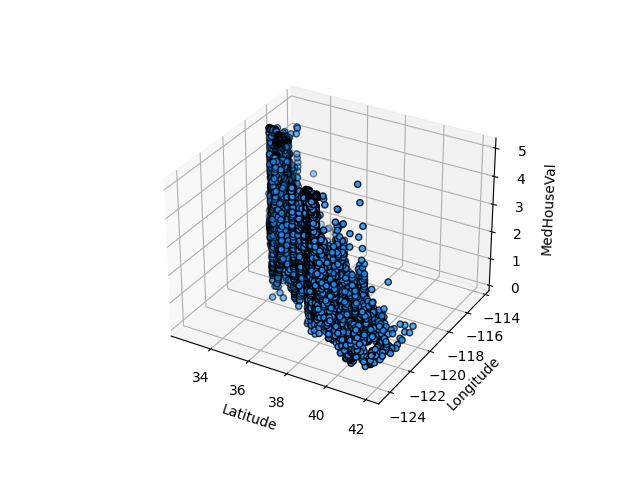

In [61]:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_california.Latitude, X_california.Longitude, y_california, facecolor="dodgerblue", edgecolor="k", label="test")

    ax.set_xlabel("Latitude")
    ax.set_ylabel("Longitude")
    ax.set_zlabel("MedHouseVal")

En estos gráficos podemos ver que  AveRooms, AveBedrms, Population, AveOccup no parecen tener correlación porque para un valor dado del feature la variable target toma cualquier valor dentro de su rango, por eso vemos lineas verticales. Sin embargo, también podemos decir que estos features tienen outliers que pueden estar interviniendo en la interpretación gráfica, por lo que luego se hicieron gráficos acotando el rango de la variable independiente.

MedInc es el feature que parece tener una correlación positiva bien marcada. También hay correlación con las variables de ubicación longitud y latitud.

HouseAge parece no tener correlación porque los datos estan muy dispersos.

Para tener una mejor visualización procedemos a acotar el eje de las variables.


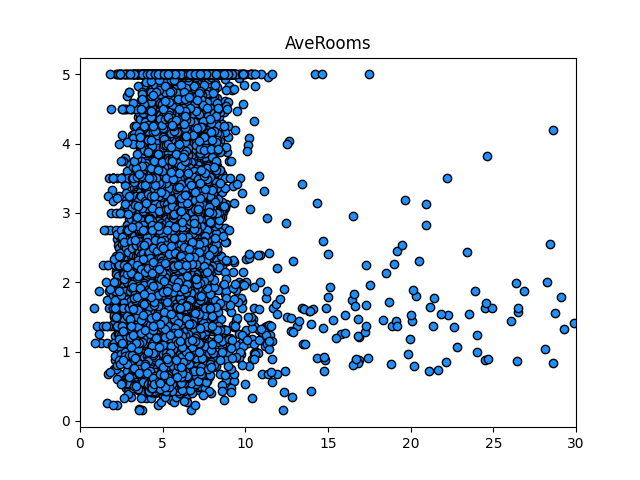

In [62]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_california['AveRooms'], target, facecolor="dodgerblue", edgecolor="k")
plt.title('AveRooms')
plt.xlim(0,30)
plt.show()

Parecería haber una correlación positiva con pendiente muy grande

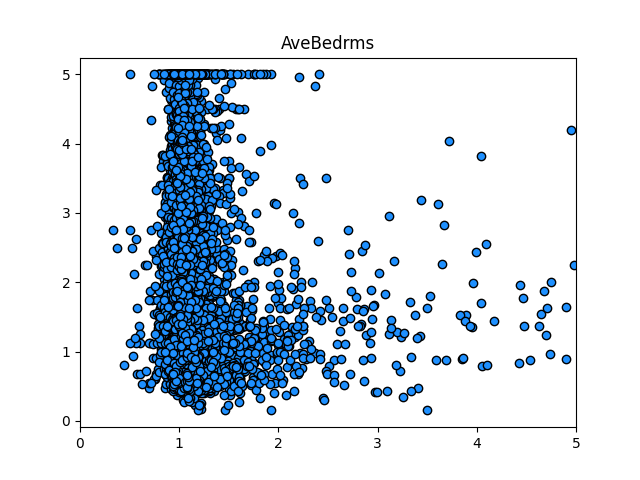

In [63]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_california['AveBedrms'], target, facecolor="dodgerblue", edgecolor="k")
plt.title('AveBedrms')
plt.xlim(0,5)
plt.show()

Parecería no haber correlación, ya que para una habitación el precio puede variar en todo el rango.

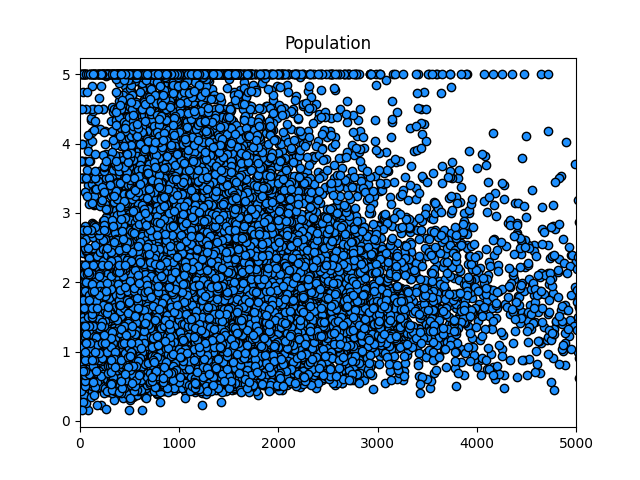

In [64]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_california['Population'], target, facecolor="dodgerblue", edgecolor="k")
plt.title('Population')
plt.xlim(0,5000)
plt.show()

Parece que no hay correlación

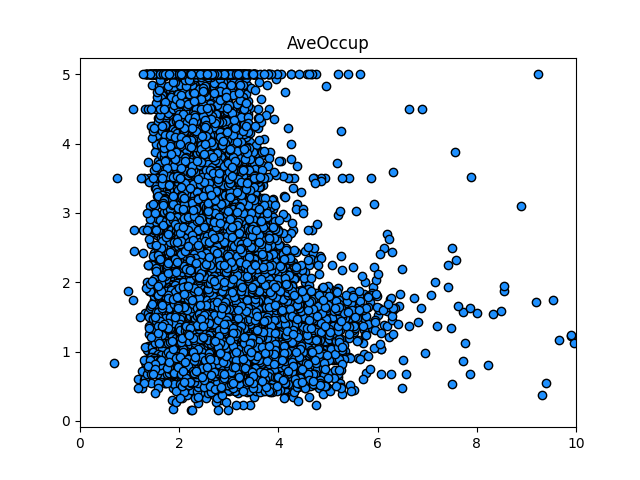

In [65]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_california['AveOccup'], target, facecolor="dodgerblue", edgecolor="k")
plt.title('AveOccup')
plt.xlim(0,10)
plt.show()

Parece no haber correlación.

Para corroborar lo predicho gráficamente usaremos el método full.corr()

In [66]:
#correlación de MedHouseValue con los demás atributos
print('Coeficientes de correlación entre la variable objetivo (MedHouseValue) y las features:')
full.corr()['MedHouseVal'].sort_values(ascending=False)


Coeficientes de correlación entre la variable objetivo (MedHouseValue) y las features:


MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

Como podemos ver MedInc es efectivamente la variable con mayor correlación. Luego AveRooms y Latitude. El valor que sorprende quizas es HouseAge pero estan tan dispersos los datos que era posible que se encuentre correlación aunque es sólo del 10% aproximadamente. El resto de las variables no aporta correlación significativa.

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

-------------------------------------------------------------------

3.1 Selección del atributo considerado más apropiado: MedInc

In [67]:
# Seleccionar el atributo a utilizar
feature = "MedInc"
X_train_f = X_train[[feature]]
X_test_f = X_test[[feature]]

3.2 Instanciar y entrenar la regresión lineal

In [68]:
# 2. Instanciar y entrenar acá.
from sklearn.linear_model import LinearRegression

# Instanciar
reg = LinearRegression()

# Entrenar
reg.fit(X_train_f, y_train)
print(f"Entrenamiento finalizado, el R2 es {reg.score(X_train_f, y_train)}")

Entrenamiento finalizado, el R2 es 0.47991412719941495


In [69]:
# 3. Predecir y evaluar acá.
y_pred_test = reg.predict(X_test_f)
y_pred_train = reg.predict(X_train_f)

3.3 Evaluación. Cálculo del error cuadrático medio para los conjuntos de entrenamiento y evaluación.

In [70]:
# Calcular el error cuadratico medio para los conjuntos de entrenamiento y test
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_pred_train)
val_error = mean_squared_error(y_test, y_pred_test)

print(f"Error entrenamiento: {train_error}")
print(f"Error evaluación: {val_error}")

Error entrenamiento: 0.6960681099171515
Error evaluación: 0.7214982234014606


3.4 Gráfica del modelo resultante, junto con los puntos de entrenamiento y evaluación.

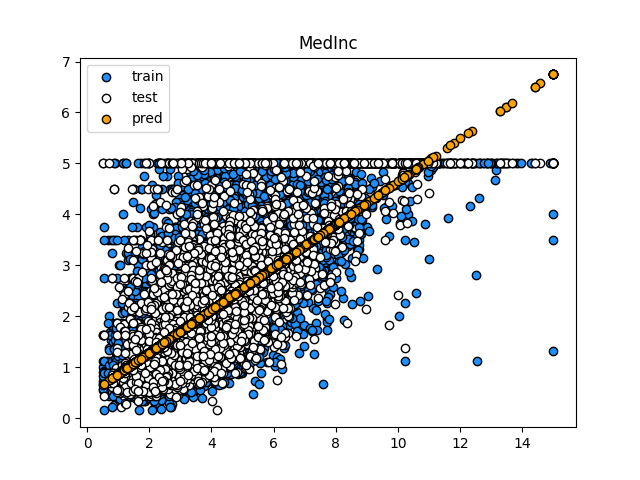

In [71]:
# 4. Graficar acá
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
ax.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
ax.scatter(X_test_f, y_pred_test, facecolor="orange", edgecolor="k", label="pred")

plt.title(feature)
plt.legend()
plt.show()

Conclusión: Si bien existe una correlación positiva, el r2 del modelo es muy pequeño (0,48), porque los datos no están distribuidos en una linea recta, si no que están dispersos.  Además los datos superiores de la variable target introducen ruido en los datos, podriamos decir que hay ciertas propiedades que son "caras" sin importar cual sea el ingreso medio. Todo esto produce que el error de entrenamiento sea alto (0.69) por lo tanto el de testeo también.

Cabe destacar que los datos originales parecen haber sufrido una transformación para los casos en que MedHouseVal hubiera sido mayor a 5.

Nuestro modelo tendrá una peor performance para los valores más grandes de MedInc.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

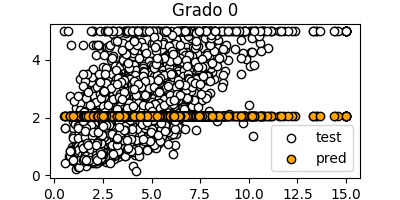

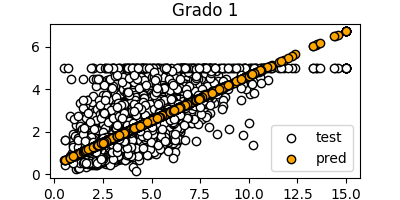

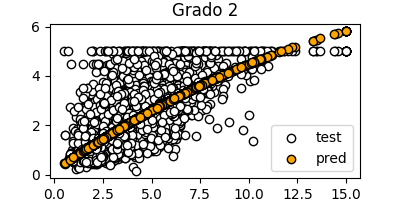

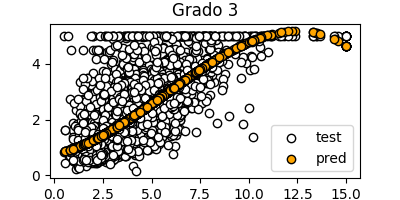

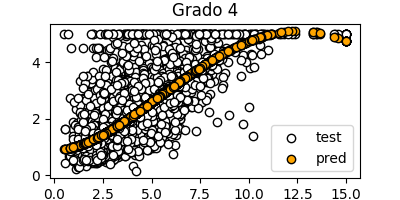

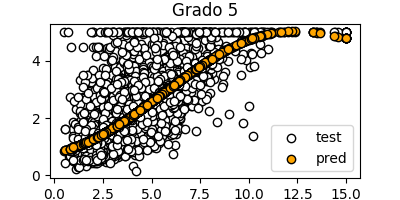

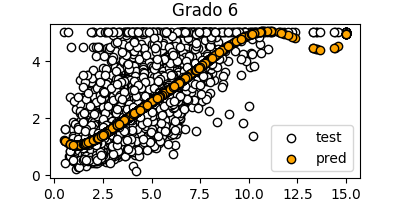

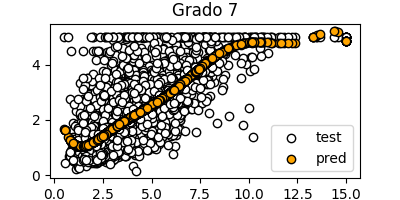

In [72]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

train_errors = []
val_errors = []
degrees = range(8)

for degree in degrees:
    # instanciar y entrenar :
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)

    # predecir:
    y_train_pred = model.predict(X_train_f)
    y_val_pred = model.predict(X_test_f)

    # evaluar:
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_test, y_val_pred)
    train_errors.append(train_error)
    val_errors.append(val_error)

    fig = plt.figure(figsize=(4, 2))
    ax = fig.add_subplot()
    ax.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
    ax.scatter(X_test_f, y_val_pred, facecolor="orange", edgecolor="k", label="pred")

    plt.title(f"Grado {degree}")
    plt.legend()
    plt.show()

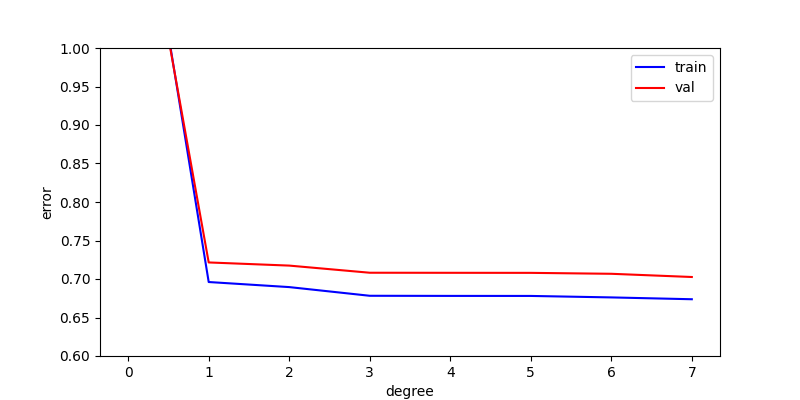

In [73]:
# 2. Graficar curvas de error acá.

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot()
ax.plot(degrees, train_errors, color="blue", label="train")
ax.plot(degrees, val_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.ylim(0.6, 1)
plt.show()

Consideramos que un grado mayor a 3 complejiza el modelo y no aporta una reducción significativa en los errores, por lo que consideramos que el polinomio de grado 3 sería el más apropiado.

Con respecto al overfitting, no se observa un punto a partir del cual haya un sobreajuste. Lo que pudimos observar mediante pruebas es que, para grados superiores a 14, ambos tipos de errores se _disparan:_ tanto el error de validación como el de test.

**Modelo elegido**

grado 3

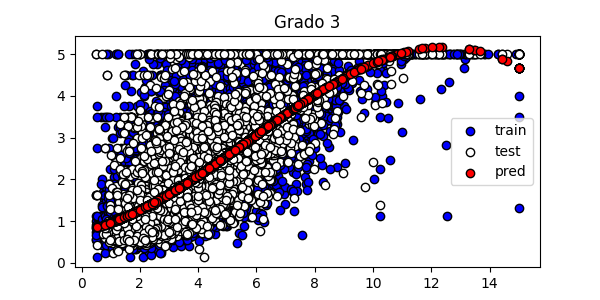

In [74]:
degree = 3
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)
model = make_pipeline(pf, lr)
model.fit(X_train_f, y_train)
y_train_pred = model.predict(X_train_f)
y_val_pred = model.predict(X_test_f)
train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_test, y_val_pred)
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot()
ax.scatter(X_train_f, y_train, facecolor="blue", edgecolor="k", label="train")
ax.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
ax.scatter(X_test_f, y_val_pred, facecolor="red", edgecolor="k", label="pred")
plt.title(f"Grado {degree}")
plt.legend()
plt.show()

Se observa que en el conjunto de datos, para valores de MedInc mayores 9, la cantidad de observaciones comienza a reducirse considerablemente. Para valores mayores a 10, las observaciones son ya muy pocas y la mayoría de ellas se corresponden con valores de MedHouseVal = 5 (el máximo valor de la variable objetivo). Cabe destacar que los datos originales parecen haber sufrido una transformación para los casos en que MedHouseVal hubiera sido mayor a 5.

Nuestro modelo tendrá una peor performance para los valores más grandes de MedInc.
    
    

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [75]:
# 1. Resolver acá.

# Elección de 2 features
features = ["MedInc", "AveRooms"]
X_train_f2 = X_train[features]
X_test_f2 = X_test[features]

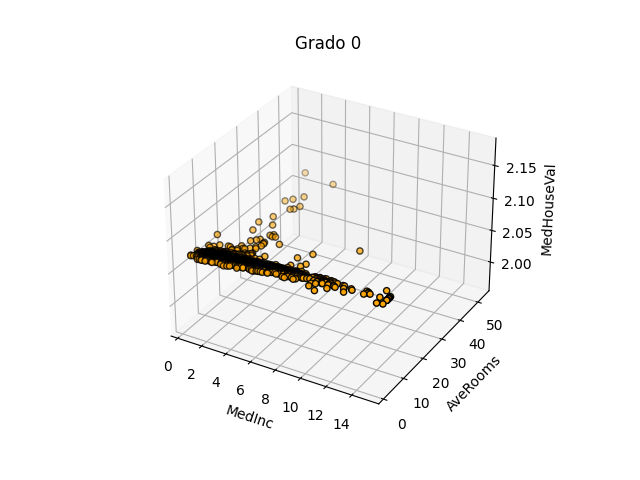

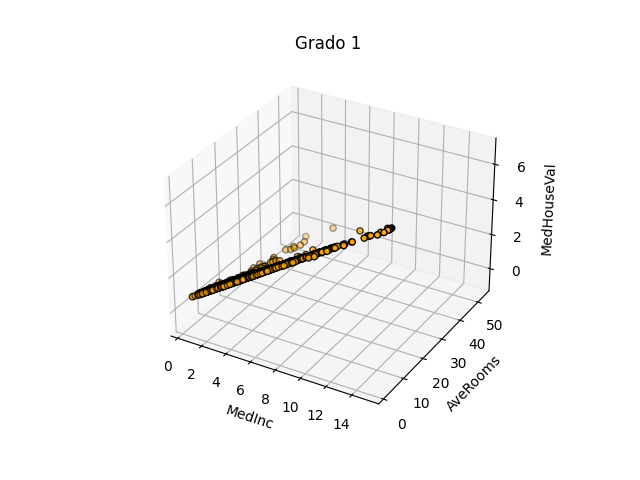

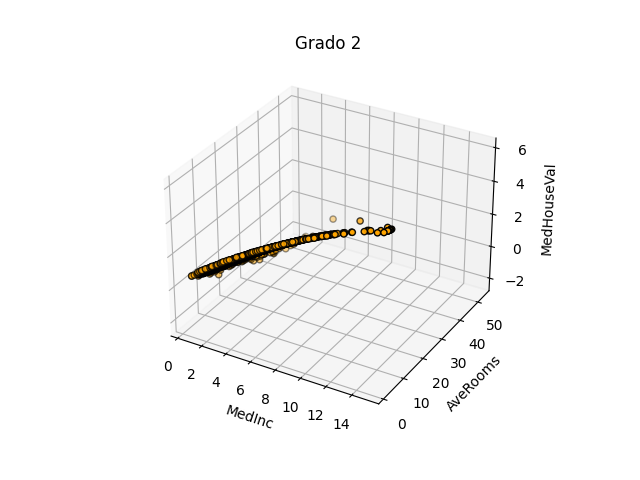

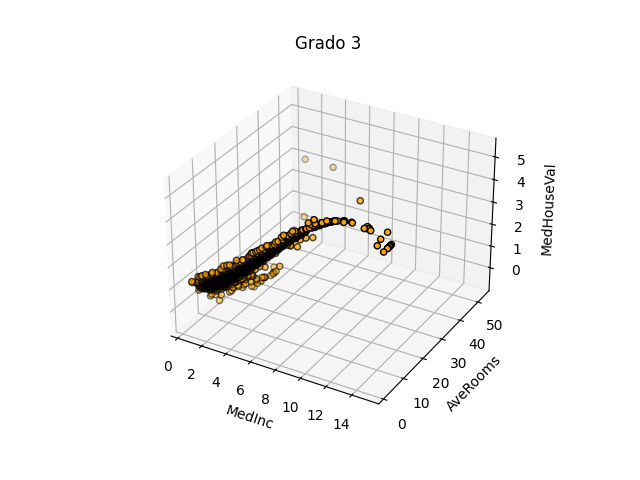

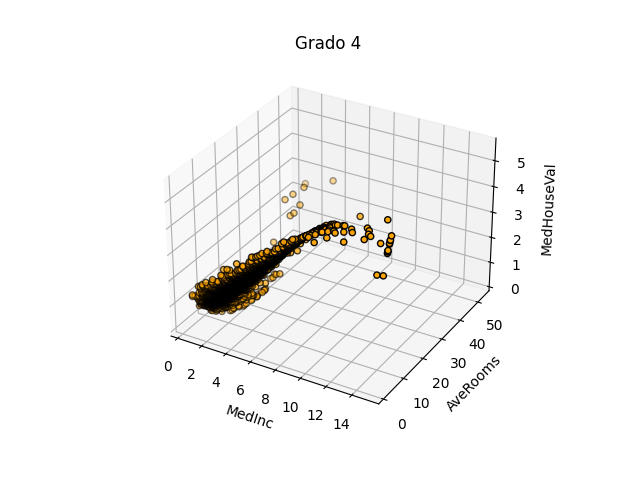

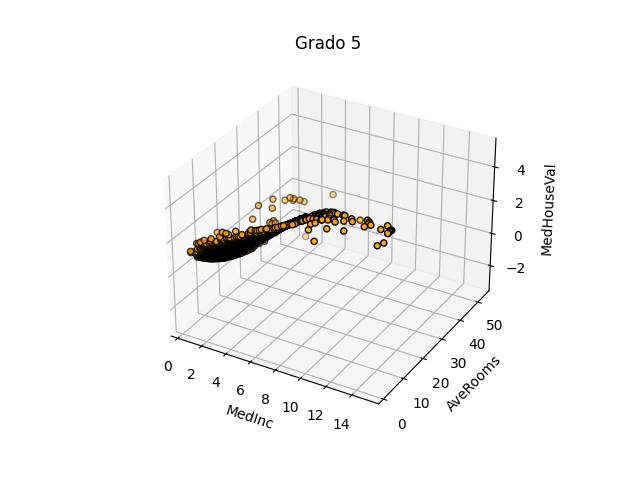

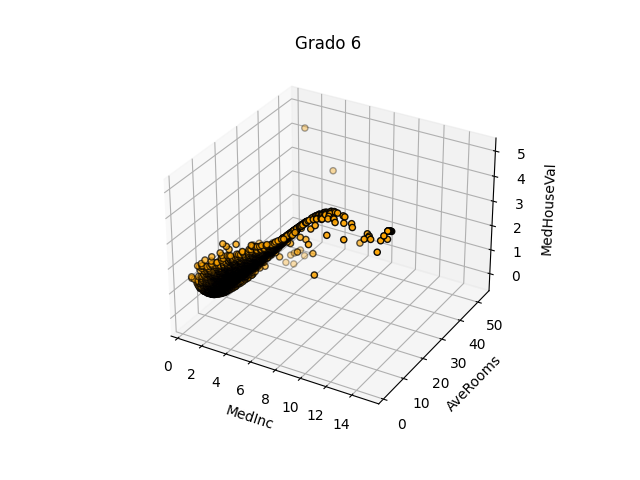

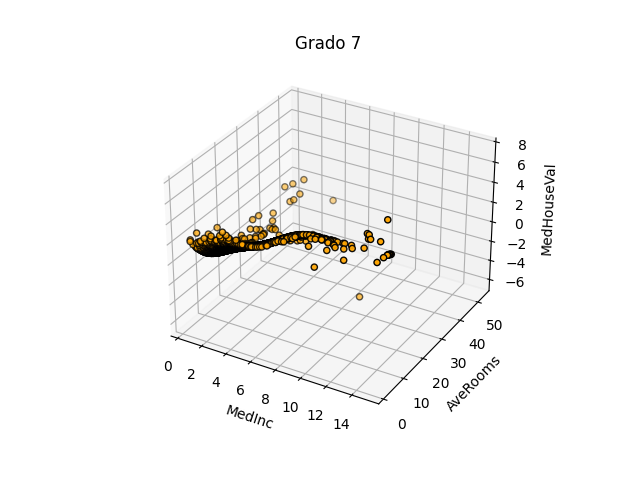

In [76]:
train_errors_2f = []
val_errors_2f = []
degrees = range(8)

for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f2, y_train)

    # predict:
    y_train_pred = model.predict(X_train_f2)
    y_val_pred = model.predict(X_test_f2)

    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_test, y_val_pred)
    train_errors_2f.append(train_error)
    val_errors_2f.append(val_error)


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_test_f2.MedInc, X_test_f2.AveRooms, y_val_pred, facecolor="orange", edgecolor="k", label="pred")

    ax.set_xlabel("MedInc")
    ax.set_ylabel("AveRooms")
    ax.set_zlabel("MedHouseVal")

    plt.title(f"Grado {degree}")
    plt.show()

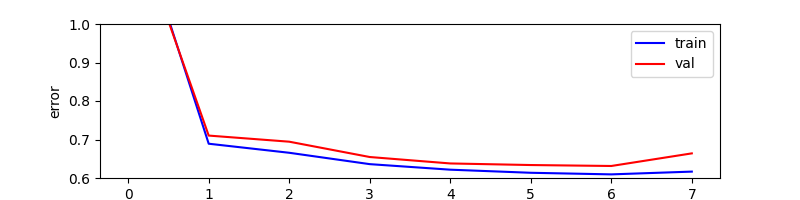

In [88]:
fig = plt.figure(figsize=(8, 2))
ax = fig.add_subplot()
ax.plot(degrees, train_errors_2f, color="blue", label="train")
ax.plot(degrees, val_errors_2f, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.ylim(0.6, 1)
plt.show()

Conclusión: Se observa que al agregar el feature AveRoms logramos mejorar el modelo ya que el error cuadratico disminuye, aunque muy poco (de 0,68 a 0,63). Si tuvieramos que elegir un grado, volveria a ser el grado 3. Podemos ver que a partir del grado 7 ocurriría overfitting.

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.




In [78]:
multiple_train_errors = []
multiple_val_errors = []
degrees = range(8)

for degree in degrees:
    # train:
    multiple_pf = PolynomialFeatures(degree)
    multiple_lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(multiple_pf, multiple_lr)
    model.fit(X_train, y_train)

    # predict:
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_test)

    # evaluate:
    multiple_train_error = mean_squared_error(y_train, y_train_pred)
    multiple_val_error = mean_squared_error(y_test, y_val_pred)
    multiple_train_errors.append(multiple_train_error)
    multiple_val_errors.append(multiple_val_error)

print(multiple_train_errors)
print(multiple_val_errors)

[1.3383715004003633, 0.5234413607125448, 0.4197000446847601, 0.35014726852570055, 0.3464648074336568, 0.3549923194439671, 0.46152286749199384, 6.945908741645478]
[1.3043431479307854, 0.5289841670367277, 2.763846015655216, 290791.625930706, 1119115970.6401215, 49423044581.39128, 648350785529.1982, 61940651649.927704]


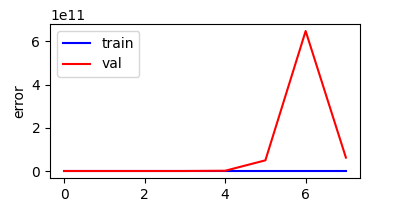

In [79]:
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot()
ax.plot(degrees, multiple_train_errors, color="blue", label="train")
ax.plot(degrees, multiple_val_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

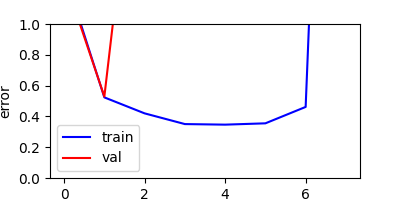

In [80]:
#HACEMOS ZOOM A LA ZONA DE INTERÉS
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot()
ax.plot(degrees, multiple_train_errors, color="blue", label="train")
ax.plot(degrees, multiple_val_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.ylim(0,1)
plt.show()

Podemos ver que por arriba del cuarto grado hay overfitting muy grotesco, sin embargo ya existe a partir del segundo grado. Siendo la regresión de grado uno la que mejor funciona al realizar una regresión multivariable.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?

Se usan los datos de X_train_f2 que son los que presentan un overfitting en el grado 7 para ver si este se reduce.

In [81]:
from sklearn.linear_model import Ridge
ridge_train_errors = []
ridge_val_errors = []
degrees = range(8)

for degree in degrees:
    # instanciar y entrenar :
    ridge_pf = PolynomialFeatures(degree)
    ridge = Ridge(alpha=0.1)
    ridge_model = make_pipeline(ridge_pf, ridge)
    ridge_model.fit(X_train_f2, y_train)

    # predecir:
    y_train_pred_ridge = ridge_model.predict(X_train_f2)
    y_val_pred_ridge = ridge_model.predict(X_test_f2)

    # evaluar:
    ridge_train_error = mean_squared_error(y_train, y_train_pred_ridge)
    ridge_val_error = mean_squared_error(y_test, y_val_pred_ridge)
    ridge_train_errors.append(ridge_train_error)
    ridge_val_errors.append(ridge_val_error)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.7302e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.94994e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.01282e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.2376e-32): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


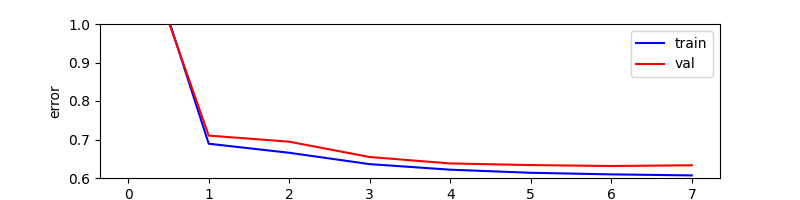

In [86]:
fig = plt.figure(figsize=(8, 2))
ax = fig.add_subplot()
ax.plot(degrees, ridge_train_errors, color="blue", label="train")
ax.plot(degrees, ridge_val_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.ylim(0.6, 1)
plt.show()

In [91]:
diferencia1 = np.array(ridge_val_errors) - np.array(val_errors_2f)
diferencia1

array([ 0.00000000e+00, -1.21863490e-07, -1.53194015e-06,  1.20430788e-06,
        3.92007449e-06, -8.26751629e-05, -5.28992389e-05, -3.09208339e-02])

Graficamente podemos ver que el overfitting para el grado 7 se redujo. Sin embargo, nos apreciable el efecto que tiene penalizar al modelo en cuanto al resto de los grados y sus errores.
Para ver como funciona la penalización volvemos hacer el calculo pero con un alfa más grande.

In [95]:
from sklearn.linear_model import Ridge
ridge_train_errors_b = []
ridge_val_errors_b = []
degrees = range(8)

for degree in degrees:
    # instanciar y entrenar :
    ridge_pf_b = PolynomialFeatures(degree)
    ridge_b = Ridge(alpha=0.5)
    ridge_model_b = make_pipeline(ridge_pf, ridge)
    ridge_model_b.fit(X_train_f2, y_train)

    # predecir:
    y_train_pred_ridge_b = ridge_model.predict(X_train_f2)
    y_val_pred_ridge_b = ridge_model.predict(X_test_f2)

    # evaluar:
    ridge_train_error_b = mean_squared_error(y_train, y_train_pred_ridge_b)
    ridge_val_error_b = mean_squared_error(y_test, y_val_pred_ridge_b)
    ridge_train_errors_b.append(ridge_train_error_b)
    ridge_val_errors_b.append(ridge_val_error_b)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.6188e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.6188e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.6188e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.6188e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: I

In [98]:
diferencia2= np.array(ridge_val_errors_b) - np.array(val_errors_2f)
print(diferencia1)
print(diferencia2)

[ 0.00000000e+00 -1.21863490e-07 -1.53194015e-06  1.20430788e-06
  3.92007449e-06 -8.26751629e-05 -5.28992389e-05 -3.09208339e-02]
[-6.71301408e-01 -7.71510092e-02 -6.12664792e-02 -2.14536204e-02
 -4.74293817e-03 -6.30781598e-04  1.83290271e-03 -3.09208339e-02]


Podemos ver como aumentando el alfa conseguimos diferencias más grandes en valor absoluto entre el error de metodo ridge y el metodo sin penalización. Es decir que achicamos el error. Exceptuando el grado 7 donde el error ya es el mismo en ambos casos.

**Conclusión General**: Atribuimos el hecho de obtener un error grande para el modelo al hecho de que estamos trabajando con datos sin curación previa y con escaza correlación con la variable target. Por otro lado, quizas existan otro tipo de modelos más adecuados para poder trabajar con este dataset.